# LLE on HSI data - SalinasA. This is the [LLE Class](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html) implementation. Scroll down for the functional implementation.

In [15]:
from umap_script import loadHSI, show_clusterable_embedding, visualize_umap, compare_umap, k_means, calculate_aligned_accuracy, plot

import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import locally_linear_embedding
from matplotlib.animation import FuncAnimation
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

In [2]:
salinasA_path = 'data/SalinasA_corrected.mat'
salinasA_gt_path = 'data/SalinasA_gt.mat'

X, M, N, D, HSI, GT, Y, n, K = loadHSI(salinasA_path, salinasA_gt_path, 'salinasA_corrected', 'salinasA_gt')

In [3]:
print(HSI.shape)
print(GT.shape)

(7138, 204)
(83, 86)


In [4]:
def LLE_projection_2d(hsi_data,ground_truth,num_neighbors):
    LLE = LocallyLinearEmbedding(n_neighbors=num_neighbors,n_components=3)
    embedding = LLE.fit_transform(hsi_data)

    # Visualization
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=ground_truth.ravel(), s=0.1, cmap='Spectral')
    plt.title('2D LLE (Local Linear Embedding) Projection of the Dataset')
    plt.colorbar(scatter, label='Spectral classes')
    plt.xlabel('LLE 1')
    plt.ylabel('LLE 2')
    plt.show()

Number of neighbors = 1000

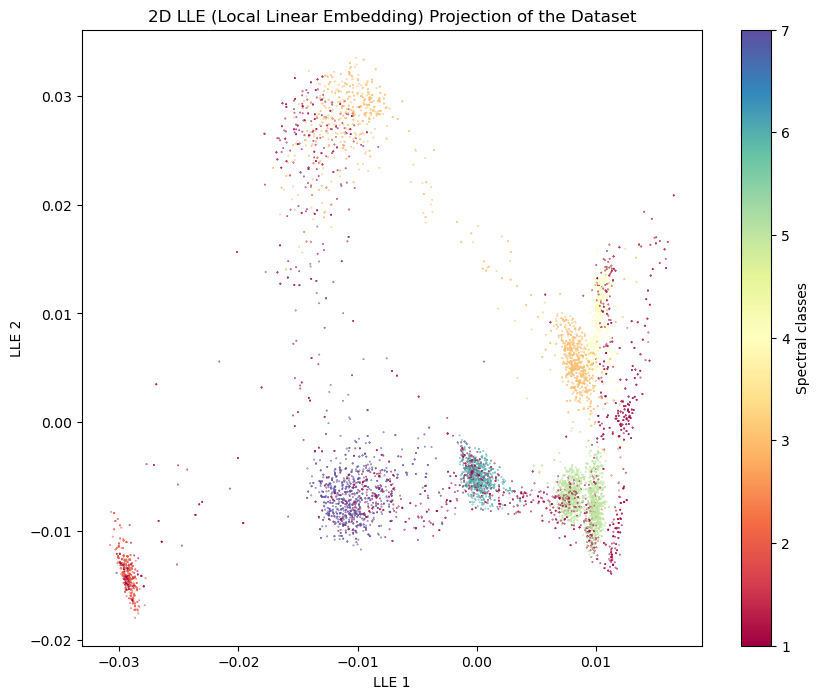

In [44]:
LLE_projection_2d(HSI,GT,1000)

Number of neighbors - 5 (default)

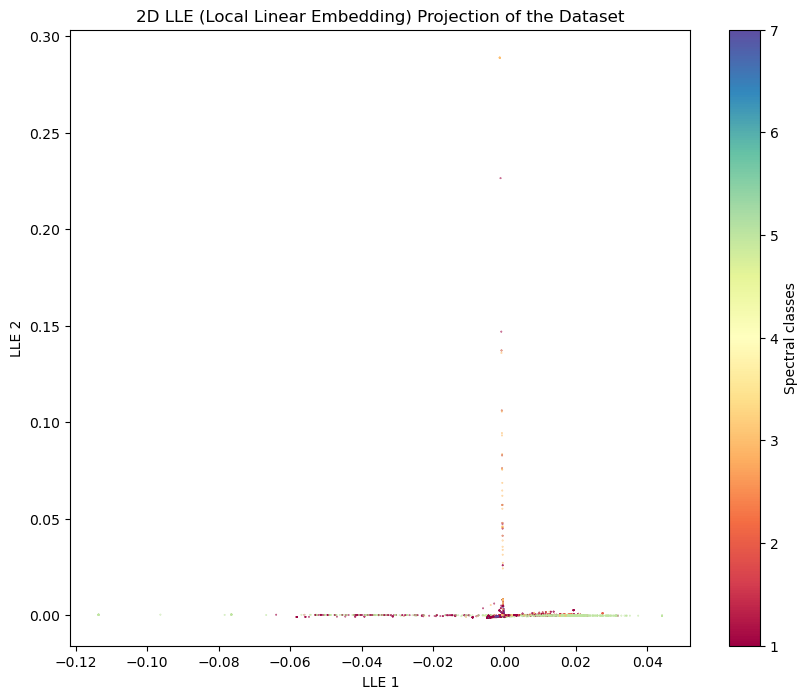

In [9]:
LLE_projection_2d(HSI,GT,5)

In [1]:
def visualize_lle(hsi_data,num_neighbors,title=''):
    LLE = LocallyLinearEmbedding(n_neighbors=num_neighbors,n_components=3)
    u = LLE.fit_transform(hsi_data)
    plt.title(title, fontsize=18)
    return u

0.4653060707359879
[2 2 2 ... 0 0 0]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(0.4653060707359879, array([2, 2, 2, ..., 0, 0, 0], dtype=int32))

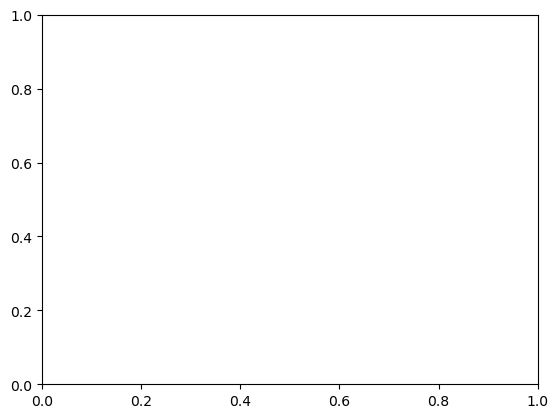

In [14]:
k_means(GT,dim_reduced_data = visualize_lle(HSI,num=1000),n_components=3,method = "LLE")

In [47]:
def compare_pca(data,ground_truth,dataset_name,compare_dim,compare_neighbors):
    lle_ari = []
    lle_aligned_acc = []
    pca_ari = []
    pca_aligned_acc = []
    dims = [400,600,800,1000]
    pca_dims = [1,2,3,4]
    for i in range(1,len(dims)):            
        lle_plot = visualize_lle(data,num_neighbors=dims[i])
        k_means_lle_ari, k_means_lle_labels = k_means(ground_truth,dim_reduced_data = lle_plot, n_components = pca_dims[i], method = "LLE")
        k_means_pca_ari, k_means_pca_labels = k_means(ground_truth, data = data, n_components= pca_dims[i], method = "PCA")

        lle_ari.append(k_means_lle_ari)
        pca_ari.append(k_means_pca_ari)

        lle_acc = calculate_aligned_accuracy(ground_truth, k_means_lle_labels)
        pca_acc = calculate_aligned_accuracy(ground_truth, k_means_pca_labels)

        lle_aligned_acc.append(lle_acc)
        pca_aligned_acc.append(pca_acc)
    dims = dims[1:]
    plot(dims,lle_ari, pca_ari,lle_aligned_acc,pca_aligned_acc, plot_title = 'Adjusted Rand Index (ARI) vs. Number of Neighbors for' + dataset_name, x_label = 'Number of Neighbors', dim_label = 'LLE (Local Linear Embedding)')

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.45843681340235437
[1 1 1 ... 0 0 0]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.3170340225197159
[0 0 0 ... 6 6 6]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.49087874040235013
[2 2 2 ... 6 6 6]
0.3790962416831678
[3 3 3 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.48610789912544267
[4 4 4 ... 6 6 6]
0.39043446236279167
[3 3 3 ... 0 0 0]


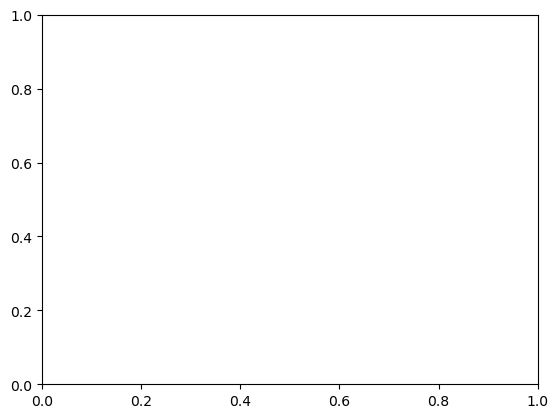

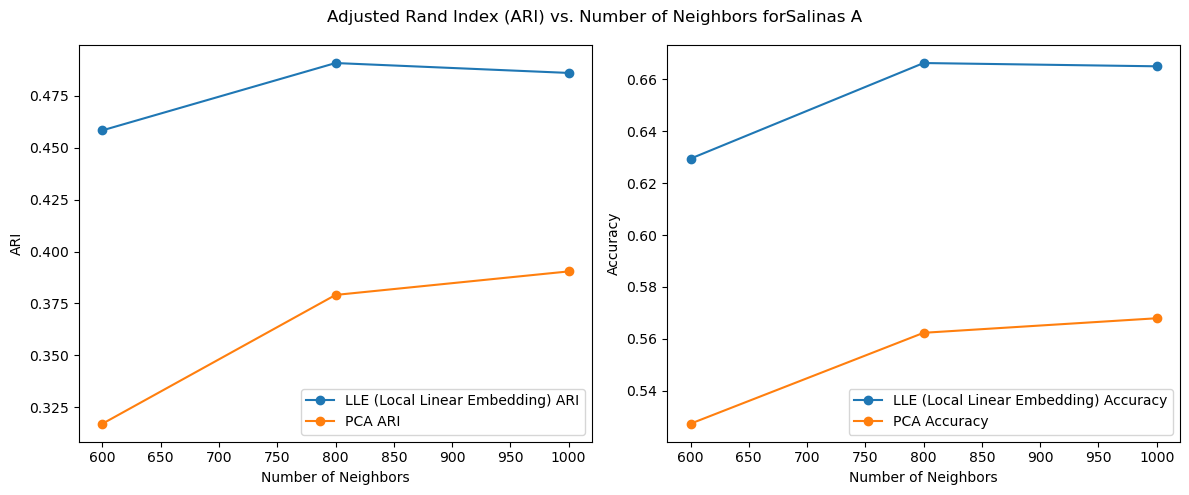

In [48]:
compare_pca(HSI,GT,"Salinas A", True, True)

# Below is an implementation of the [Locally Linear Embedding function](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html)

In [25]:
# lll_fn_projection_2d(HSI,GT,1000)
embedding,_ = locally_linear_embedding(HSI,n_neighbors=1000,n_components=3)
embedding

array([[ 0.02886536, -0.01664058,  0.01903771],
       [ 0.02949771, -0.01558746,  0.01937848],
       [ 0.02862968, -0.01720139,  0.01930199],
       ...,
       [-0.01272561, -0.00108702,  0.00905044],
       [-0.01293279, -0.00145236,  0.00864999],
       [-0.01211541, -0.00069009,  0.00741308]])

In [36]:
def lle_fn_projection_2d(ground_truth,hsi_data = None,num = None):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(embedding[:, 0], embedding[:, 1], c=ground_truth.ravel(), s=0.1, cmap='Spectral')
    ax.set_title("2D Projection of the dataset: LLE Function")

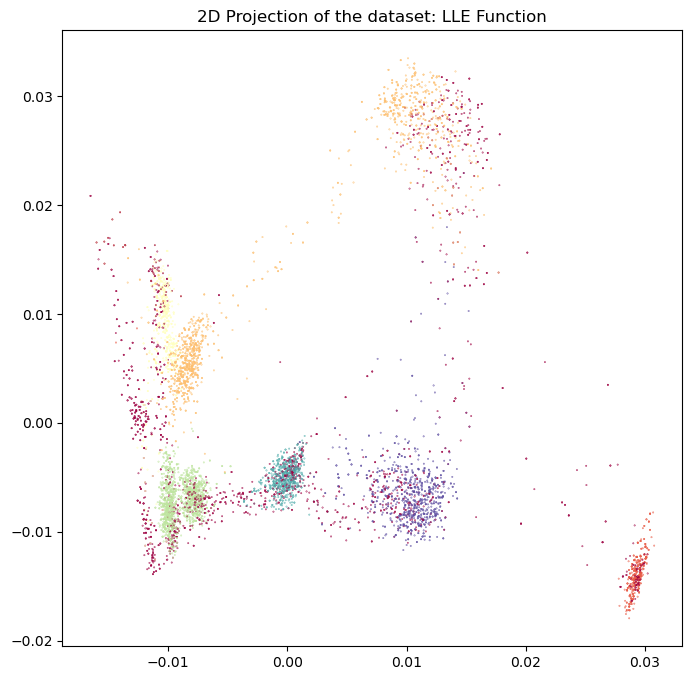

In [37]:
lle_fn_projection_2d(GT)

In [38]:
def visualize_lle_fn(hsi_data,num,title=''):
    embedding,_ = locally_linear_embedding(hsi_data,n_neighbors=num,n_components=3)
    embedding
    plt.title(title, fontsize=18)
    return embedding

array([[-0.04156906, -0.01143269,  0.00015789],
       [-0.04156906, -0.01142947,  0.00019927],
       [-0.04156906, -0.01143151,  0.00017261],
       ...,
       [ 0.00591685, -0.00894729, -0.01676128],
       [ 0.00602482, -0.00938804, -0.01525464],
       [ 0.00602747, -0.00951616, -0.01030048]])

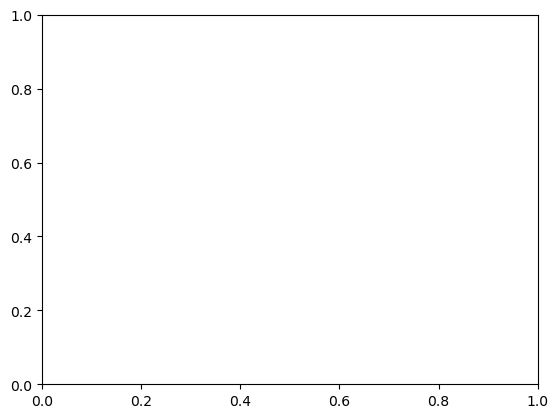

In [39]:
visualize_lle_fn(HSI,50)

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.4648409249447008
[2 2 2 ... 4 4 4]


(0.4648409249447008, array([2, 2, 2, ..., 4, 4, 4], dtype=int32))

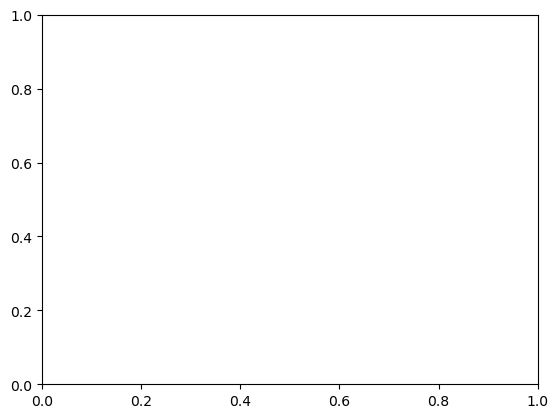

In [40]:
k_means(GT,dim_reduced_data = visualize_lle_fn(HSI,num=50),n_components=3,method = "LLE")

In [42]:
def compare_pca(data,ground_truth,dataset_name,compare_dim,compare_neighbors):
    lle_ari = []
    lle_aligned_acc = []
    pca_ari = []
    pca_aligned_acc = []
    dims = [400,600,800,1000]
    pca_dims = [1,2,3,4]
    for i in range(1,len(dims)):            
        lle_plot = visualize_lle_fn(data,num=dims[i])
        k_means_lle_ari, k_means_lle_labels = k_means(ground_truth,dim_reduced_data = lle_plot, n_components = 3, method = "LLE")
        k_means_pca_ari, k_means_pca_labels = k_means(ground_truth, data = data, n_components= pca_dims[i], method = "PCA")

        lle_ari.append(k_means_lle_ari)
        pca_ari.append(k_means_pca_ari)

        lle_acc = calculate_aligned_accuracy(ground_truth, k_means_lle_labels)
        pca_acc = calculate_aligned_accuracy(ground_truth, k_means_pca_labels)

        lle_aligned_acc.append(lle_acc)
        pca_aligned_acc.append(pca_acc)
    dims = dims[1:]
    plot(dims,lle_ari, pca_ari,lle_aligned_acc,pca_aligned_acc, plot_title = 'Adjusted Rand Index (ARI) vs. Number of Neighbors for' + dataset_name, x_label = 'Number of Neighbors', dim_label = 'LLE (Local Linear Embedding) Function')

/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.45843681340235437
[1 1 1 ... 0 0 0]
0.3170340225197159
[0 0 0 ... 6 6 6]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.49087874040235013
[2 2 2 ... 6 6 6]
0.3790962416831678
[3 3 3 ... 5 5 5]


/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aryamantepal/anaconda3/envs/ML-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.48610789912544267
[2 2 2 ... 6 6 6]
0.39043446236279167
[3 3 3 ... 0 0 0]


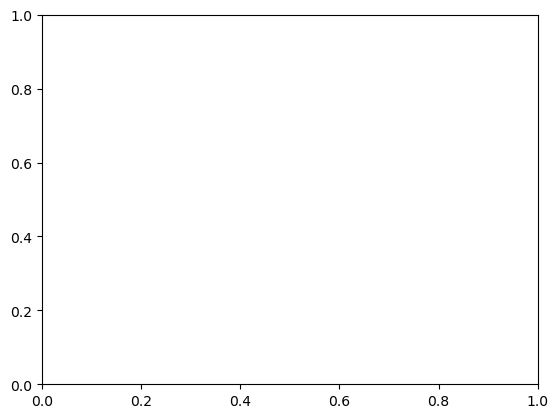

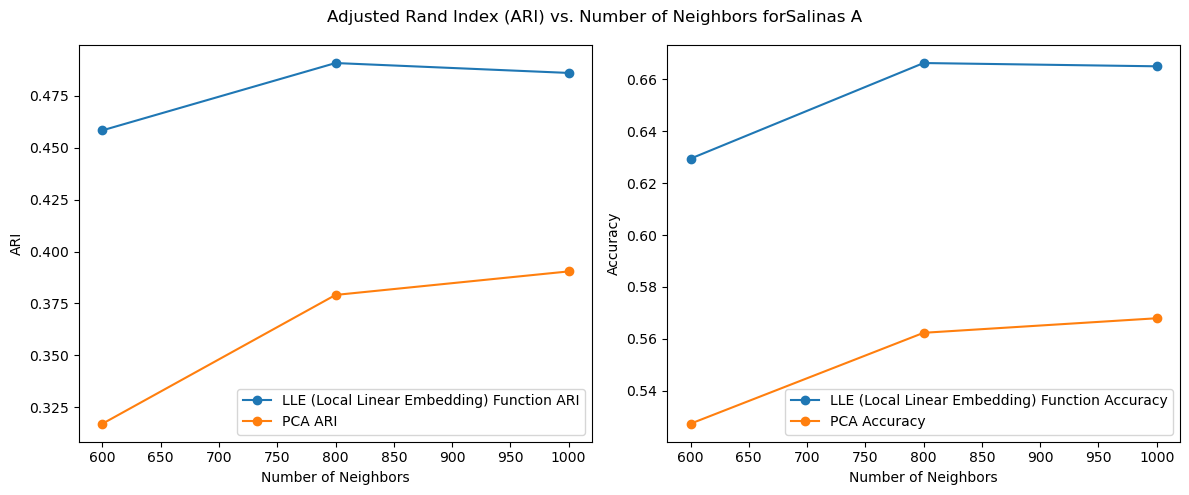

In [43]:
compare_pca(HSI,GT,"Salinas A", True, True)